# Análise Descritiva - Terceiro Estágio [Jerônimo de Castro]

In [61]:
import pandas as pd

# Importação do arquivo horarios_ufersa.csv para o Pandas
df_horarios_ufersa = pd.read_csv('horarios_ufersa.csv', names = ['SIAPE', 'NIVEL', 'PERIODO', 'COD_DISCIPLINA', 'NOME_DISCIPLINA', 'CARGA_HORARIA', 'HORARIOS'])

# Importação do arquivo professors_information.csv para o Pandas
df_info_professores = pd.read_csv('professors_information.csv', names = ['SIAPE', 'NOME', 'DEPARTAMENTO', 'LINK_FOTO', 'LINK_PERFIL'])

## Pergunta 1 - Qual o período com o maior número de disciplinas ministradas no sábado pela manhã, tarde ou noite?

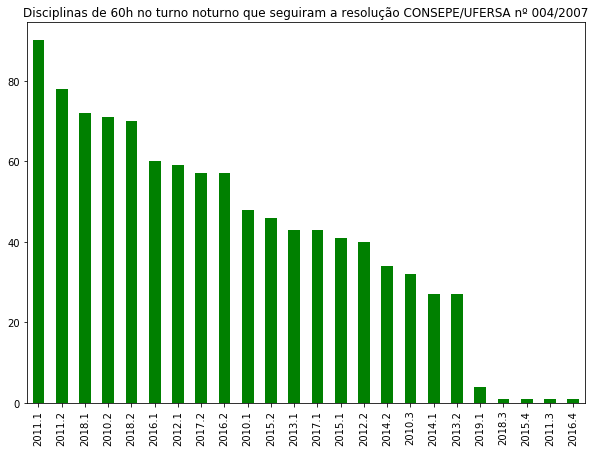

In [62]:
# Criação de DataFrame com disciplinas ministradas no sábado pela manhã
df_sabado_manha = df_horarios_ufersa[df_horarios_ufersa.HORARIOS.str.contains('7M')]

# Criação de DataFrame com disciplinas ministradas no sábado pela tarde
df_sabado_tarde = df_horarios_ufersa[df_horarios_ufersa.HORARIOS.str.contains('7T')]

# Criação de DataFrame com disciplinas ministradas no sábado a noite
df_sabado_noite = df_horarios_ufersa[df_horarios_ufersa.HORARIOS.str.contains('7N')]

# Concatenação dos DataFrames dos três turno
df_sabado = pd.concat([df_sabado_manha, df_sabado_tarde, df_sabado_noite])

# Plotagem do gráfico
df_sabado["PERIODO"].value_counts().plot.bar(title='Disciplinas de 60h no turno noturno que seguiram a resolução CONSEPE/UFERSA nº 004/2007', color='g', figsize=(10, 7))

### R.: Como pode ser visto no gráfico, o período que mais teve disciplinas ministradas nos três turnos do sábado foi 2011.1. Não é possível identificar por meio do gráfico obviamente, os motivos pelos quais disciplinas são ministradas à tarde e à noite no sábado, horários não letivos da semana. É possível supor que se tratem de casos excepcionais, uma vez que eles não se mantiveram constantes ao longo dos períodos e houve anos com 3 ou 4 períodos (2018.3, 2015.4, 2011.3, 2016.4).

## Pergunta 2 - Houve crescimento no número de disciplinas de 60h ministradas no turno noturno que seguiram a resolução CONSEPE/UFERSA nº 004/2007 no período 2017.1 a 2018.2? 

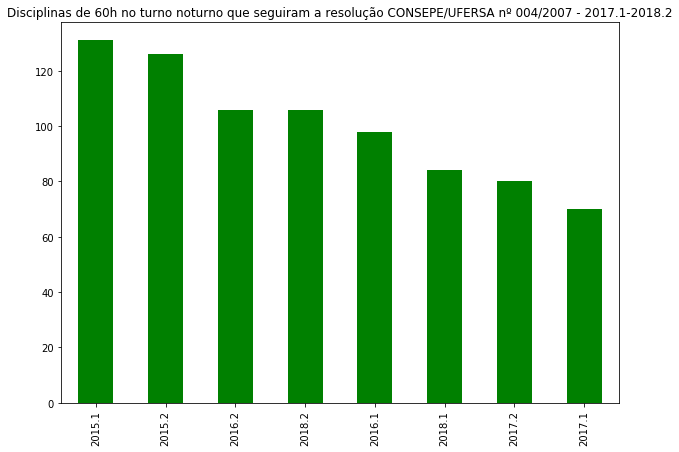

In [63]:
# Busca no DataFrame df_horarios_ufersa das disciplinas que seguiram a resolução CONSEPE/UFESA nº 004/2007
df_p2 = df_horarios_ufersa[((df_horarios_ufersa['HORARIOS'] == '2N12 4N12') | (df_horarios_ufersa['HORARIOS'] == '24N12') | (df_horarios_ufersa['HORARIOS'] == '2N34 5N34') | (df_horarios_ufersa['HORARIOS'] == '25N34') | (df_horarios_ufersa['HORARIOS'] == '3N12 6N12') | (df_horarios_ufersa['HORARIOS'] == '36N12') | (df_horarios_ufersa['HORARIOS'] == '3N34 5N12') | (df_horarios_ufersa['HORARIOS'] == '4N34 6N34') | (df_horarios_ufersa['HORARIOS'] == '46N34')) & (df_horarios_ufersa['CARGA_HORARIA'] == '60h') & ((df_horarios_ufersa['PERIODO'] >= 2015.1) & (df_horarios_ufersa['PERIODO'] <= 2018.2))]

# Plotagem do gráfico
df_p2["PERIODO"].value_counts(sort=True).plot.bar(title='Disciplinas de 60h no turno noturno que seguiram a resolução CONSEPE/UFERSA nº 004/2007 - 2017.1-2018.2', color='g', figsize=(10, 7))

### R.: Não, como pode ser visto, nas duas primeiras colunas do gráfico já demonstram que não houve crescimento na adoção da resolução. Se todos os horários a seguissem (considerando ser possível), os problemas de horários seriam resolvidos?

## Pergunta 3 - Dentre as cargas horárias das disciplinas ofertadas pela Ufersa no período 2018.2, qual a mais comum?

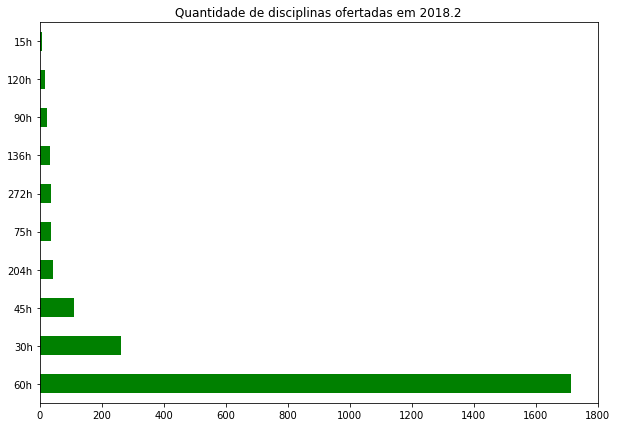

In [64]:
# Função que retorna um DataFrame com as disciplinas ofertadas no período passado como parâmetro
def qtd_disciplinas_periodo(periodo):
    df = df_horarios_ufersa[(df_horarios_ufersa['PERIODO'] == periodo)]
    return df

# Busca pelas disciplinas ofertadas em 2018.2
df_p3 = qtd_disciplinas_periodo(2018.2)

# Plotagem do gráfico

df_p3['CARGA_HORARIA'].value_counts().plot.barh(title='Quantidade de disciplinas ofertadas em 2018.2', color='g', figsize=(10, 7))

### R.: A carga horária mais comum é a de 60h tendo sido ofertada mais de 1700 disciplinas no período pesquisado.

## Pergunta 4 - Qual a distribuição percentual de oferta das disciplinas de programação (grade BSI)?

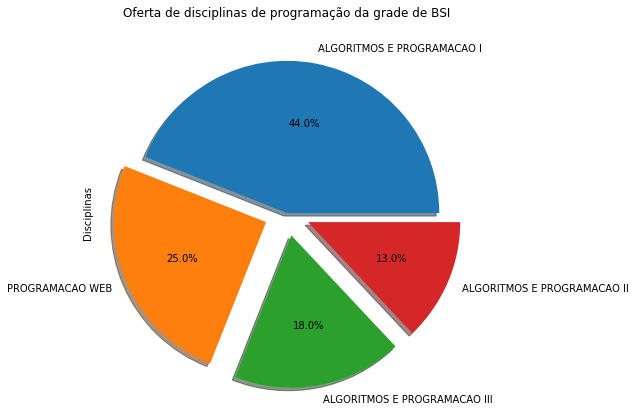

In [85]:
# Fazendo cópia do Dataframe para não modificar a original
df_aux = df_horarios_ufersa

# Renomeando as disciplinas de PROGRAMAÇÃO WEB (com acentuação) e com código (1206139) para PROGRAMACAO WEB 
df_aux = df_aux.replace('PROGRAMAÇÃO WEB', 'PROGRAMACAO WEB')
df_aux = df_aux.replace('PROGRAMACAO WEB (1206139)', 'PROGRAMACAO WEB')

# Renomeando as disciplinas de ALGORÍTMOS E PROGRAMAÇÃO I (com acentuação) para ALGORITMOS E PROGRAMACAO I
df_aux = df_aux.replace('ALGORÍTMOS E PROGRAMAÇÃO I', 'ALGORITMOS E PROGRAMACAO I')

# Renomeando as disciplinas de ALGORÍTMOS E PROGRAMAÇÃO II (com acentuação) para ALGORITMOS E PROGRAMACAO II
df_aux = df_aux.replace('ALGORÍTMOS E PROGRAMAÇÃO II', 'ALGORITMOS E PROGRAMACAO II')

# Busca pelas disciplinas ALGORITMOS E PROGRAMACAO I, ALGORITMOS E PROGRAMACAO II e ALGORITMOS E PROGRAMACAO III 
df_AP1_3 = df_aux[df_aux.NOME_DISCIPLINA.str.contains('ALGORITMOS E PROGRAMACAO')]

# Busca pela disciplina de PROGRAMACAO WEB
df_WEB = df_aux[df_aux.NOME_DISCIPLINA.str.contains('PROGRAMACAO WEB')]

# Concatenação dos Dataframes contendo as disciplinas de AP1, AP2, AP3 e PROGRAMACAO WEB
df_p4 = pd.concat([df_AP1_3, df_WEB])

df_p4['NOME_DISCIPLINA'].value_counts().plot.pie(title = 'Oferta de disciplinas de programação da grade de BSI', explode=(0, 0.15, 0.15, 0.15), label='Disciplinas', shadow=True, autopct='%.1f%%', figsize=(7, 7))

### R.: Como informa o gráfico acima, a disciplina Algorítmos e Programação I foi a disciplina mais ofertada com 44%, Algorítmos e Programação II com 13%, Algorítmos e Programação II com 18% e Programação Web com 25%. É provável que Algorítmos e Programação I seja a mais ofertada por ser uma disciplina introdutória, o que conta com um número maior de calouros, e também por estar presente na grade de outros cursos. Outro fator é alto índice de reprovação comprovado no campus Angicos. Se este último ocorre de maneira semelhante nos outros campi, talvez esta seja a causa da ofeta da disciplina Algorítmos e Programação II possuir o menor percentual, ou seja, por haver retenção na disciplina anterior.

## Pergunta 5 - Quais disciplinas o docente JOSE GILDO DE ARAUJO JUNIOR ministra/ministrou? Quantas vezes?

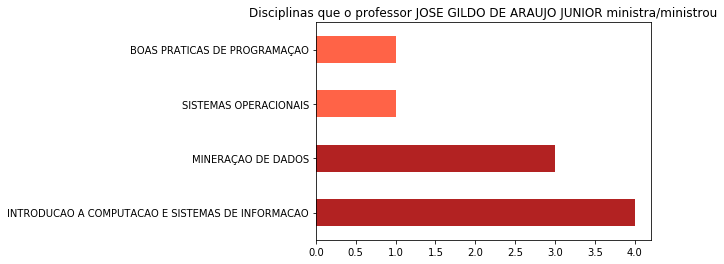

In [86]:
# Função que busca o SIAPE do professor pelo nome passado como parâmetro
def busca_siape_professor(nome_professor):
    siape = int(df_info_professores.SIAPE[df_info_professores.NOME == nome_professor])
    return siape

# Busca pelo nome do professor
siape_professor = busca_siape_professor('JOSE GILDO DE ARAUJO JUNIOR')

# Busca pelas disciplinas ministradas pelo professor
df_p5 = df_horarios_ufersa[(df_horarios_ufersa.SIAPE == siape_professor)]

# Plotagem do gráfico
df_p5['NOME_DISCIPLINA'].value_counts().plot.barh(color = ['#B22222', '#B22222', '#FF6347', '#FF6347'], title = 'Disciplinas que o professor JOSE GILDO DE ARAUJO JUNIOR ministra/ministrou')

### R.: O docente supracitado ministrou no total 4 disciplinas: Boas Práticas de Programação (1 vez), Sistemas Operacionais (1 vez), Mineração de Dados (3 vezes) e Introdução à Computação e Sistemas de Informação (4 vezes).

## Pergunta 6 - Qual o departamento da Ufersa que possui mais profissionais docentes?

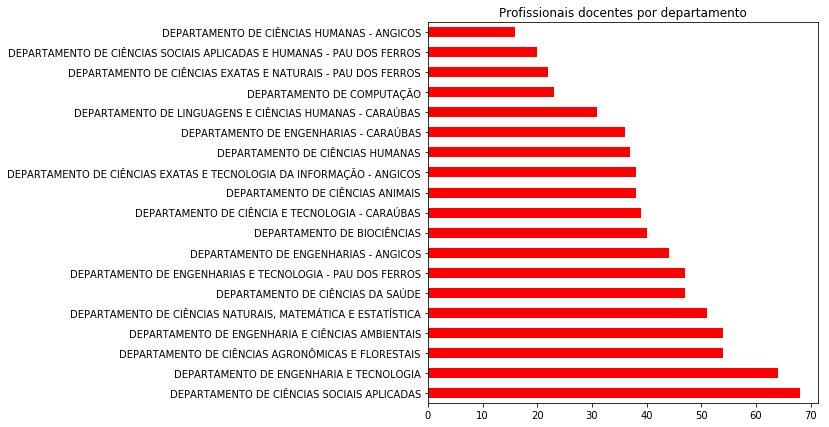

In [88]:
# Plotagem do gráfico com a quantidade dos docentes por departamento
df_info_professores.DEPARTAMENTO.value_counts().plot.barh(title='Profissionais docentes por departamento', color='red', figsize=(7, 7))

### R.: O departamento que mais possui profissionais docentes é o Departamento de Ciências Sociais Aplicadas com quase 70 pessoas. Uma análise futura interessante que pode ser feita é a verificação se há relação proporcional entre a quantidade de profissionais em um departamento e a quantidade de cursos por área.

## Pergunta 7 - Qual o horário cujas disciplinas foram ministradas em três turnos (manhã, tarde e noite) foi mais utilizado? Quantas vezes?

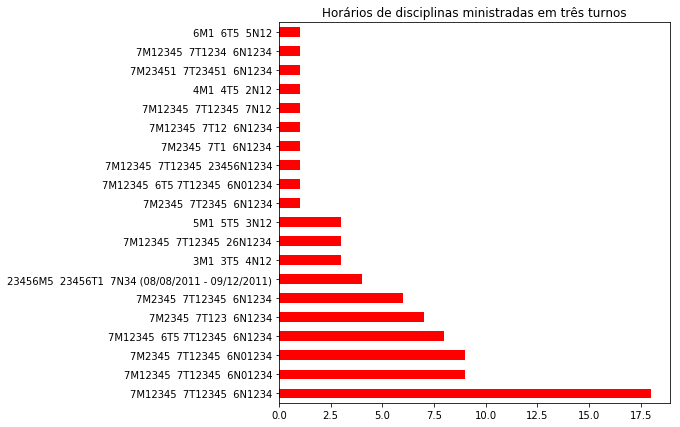

In [98]:
# Busca pelas disciplinas ministradas no turno da manhã
df_manha = df_horarios_ufersa[df_horarios_ufersa.HORARIOS.str.contains('M')]

# Busca pelas disciplinas ministradas no turno da tarde
df_manha_tarde = df_manha[df_manha.HORARIOS.str.contains('T')]

# Busca pelas disciplinas ministradas no turno da noite
df_manha_tarde_noite = df_manha_tarde[df_manha_tarde.HORARIOS.str.contains('N')]

# Plotagem do gráfico
df_manha_tarde_noite.HORARIOS.value_counts().plot.barh(title='Horários de disciplinas ministradas em três turnos', color='red', figsize=(7, 7))

### R.: O horário mais utilizado foi 7M12345 7T12345 6N1234, aparecendo 18 vezes. Dada a configuração incomum, verifiquei que trata-se de um horário adotado em turmas de pós-graduação.

## Pergunta 8 - Qual o(a) docente que mais lecionou disciplinas de pós-graduação no período 2018.1 e 2018.2 no turno noturno?

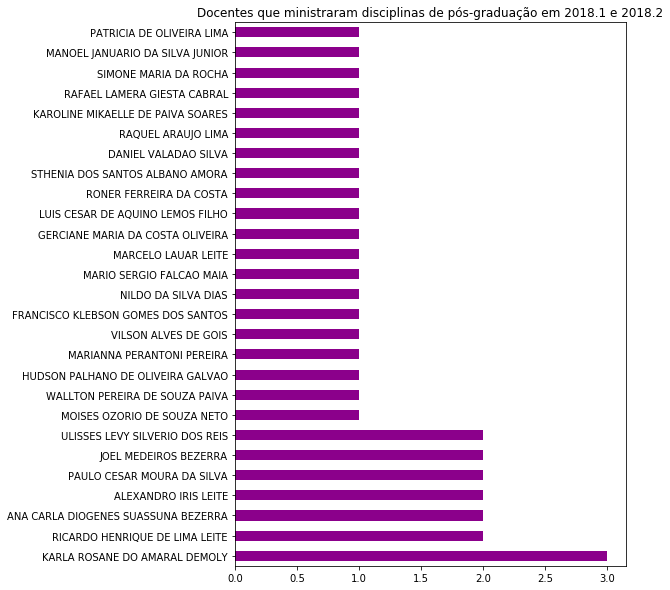

In [101]:
# Função que busca o nome do docente pelo SIAPE
def busca_nome_por_siape(numero_siape):
    nome = df_info_professores.NOME[df_info_professores.SIAPE == numero_siape].tolist()[0]
    return nome

# Busca pelos horários do turno noturno
df_p8 = df_horarios_ufersa[df_horarios_ufersa.HORARIOS.str.contains('N')]
# Busca pelas turmas da pós-graduação nos períodos 2018.1 e 2018.2
df_p8 = df_p8[(df_p8.NIVEL == 'turmas-pos') & ((df_p8.PERIODO == 2018.1) | (df_p8.PERIODO == 2018.2))]

# Lista com o SIAPE dos docentes
lista_siape = list(set(df_p8.SIAPE.tolist()))

# Busca do nome do docente pelo SIAPE
lista_nomes = []
for codigo in lista_siape:
    nome = busca_nome_por_siape(codigo)
    lista_nomes.append(nome)

# Substituição do código dos docentes pelos seus respectivos nomes
i = 0
tamanho_lista = len(lista_siape)
while i < tamanho_lista:
    df_p8 = df_p8.replace(lista_siape[i] , lista_nomes[i])
    i += 1

# Plotagem do gráfico
df_p8.SIAPE.value_counts().plot.barh(title='Docentes que ministraram disciplinas de pós-graduação em 2018.1 e 2018.2', color='#8B008B', figsize=(7, 10))

### R.: A docente que mais lecionou disciplinas de pós-graduação em 2018.1 e 2018.2 foi Karla Rosane do Amaral Demoly (3 disciplinas). A grande maioria dos docentes lecionaram uma ou duas. Uma hipóstese é que estes docentes cumprem carga horária com disciplinas da graduação.

## Pergunta 9 - Quais as 10 disciplinas mais ofertadas pela Ufersa?

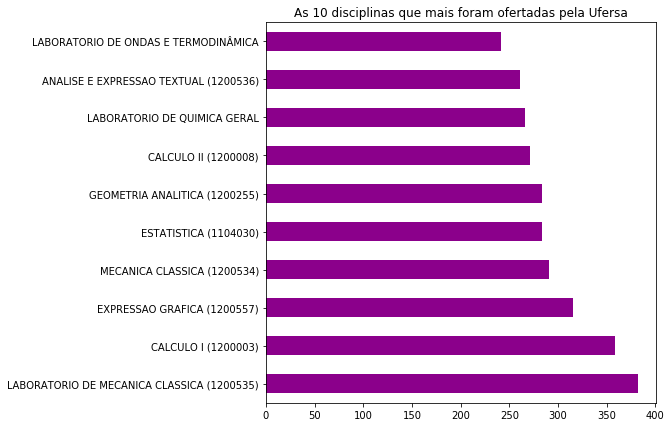

In [103]:
# Contagem e plotagem do gráfico com as 10 disciplinas que mais foram ofertadas pela Ufersa
df_horarios_ufersa.NOME_DISCIPLINA.value_counts().head(10).plot.barh(title='As 10 disciplinas que mais foram ofertadas pela Ufersa', color='#8B008B', figsize=(7, 7))

### R.: As 10 disciplinas mais ofertadas pela Ufersa foram Laboratório de Ondas e Termodinâmica, Análise e Expressão Textual, Laboratório de Química Geral, Cálculo II, Geometria Analítica, Estatística, Mecânica Clássica, Expressão Gráfica, Cálculo I e Laboratório de Mecânica Clássica. A partir dessa informação, como é notório que as disciplinas estão ligadas à Engenharia, é interessante verificar o motivo. Uma hipótese é que os cursos ligados à engenharia foram os primeiros a serem criados. Outra hipótese provável, é que a oferta de cursos ligados à engenharia é superior aos demais cursos.

## Pergunta 10 - Quais os cinco períodos que mais ofertaram disciplinas?

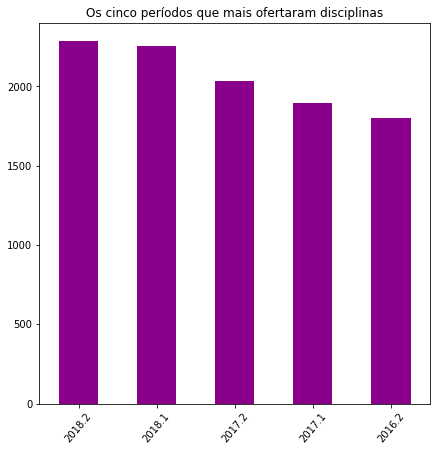

In [102]:
# Contagem dos cinco períodos que mais ofertaram disciplinas e plotagem do gráfico 
df_horarios_ufersa.PERIODO.value_counts().head(5).plot.bar(title='Os cinco períodos que mais ofertaram disciplinas', color='#8B008B', figsize=(7, 7), rot=50)

### R.: Os 5 períodos que mais ofertaram disciplinas foram: 2018.2, 2018.1, 2017.2, 2017.1, 2016.2. Como é possível também perceber, nos últimos 5 períodos, a oferta tem aumentado. Partindo disto, o analista pode verificar se a razão deste crescimento se deve ao aumento do número de vagas (o que pode ter aumentado a oferta de turmas) ou se houve o surgimento de novos cursos.